In [1]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import linalg
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'C:/Users/User/Desktop/house_price.csv')

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data preprocessing/cleaning

In [5]:
df.isnull().sum()  #checking null values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.drop("Id",axis=1,inplace=True) #dropping Id column

#### Lets check percentages of missing values

In [7]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum()/len(df)
    percent_nan=percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [8]:
percent_nan=percent_missing(df)
percent_nan

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

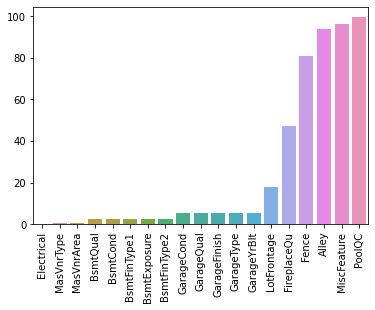

In [9]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Dealing with missing data based on rows

Lets check rows that have less 1% missing values

In [10]:
percent_nan[percent_nan<1]

Electrical    0.068493
MasVnrType    0.547945
MasVnrArea    0.547945
dtype: float64

In [11]:
100/len(df)  #0.068% represents 1 data point

0.0684931506849315

(0.0, 1.0)

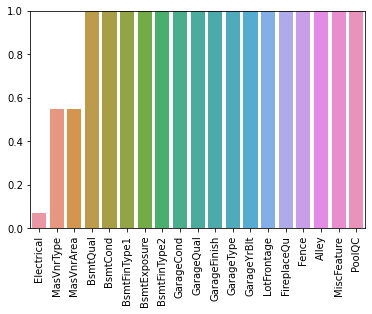

In [12]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

We can start dealing with feature that have the lowest number of missing values.

In [13]:
df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [14]:
df=df.dropna(axis=0,subset=["Electrical"])  #dropping missing value in Electrical column

In [15]:
percent_nan=percent_missing(df)
percent_nan[percent_nan<1]

MasVnrType    0.548321
MasVnrArea    0.548321
dtype: float64

##### filling missing values

In [16]:
with open('C:/Users/User/Desktop/data_description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

##### We will use the description text to fill missing values

In [17]:
df["MasVnrType"]=df["MasVnrType"].fillna("None")  #categorical feature
df["MasVnrArea"]=df["MasVnrArea"].fillna(0)       #numerical feature

In [18]:
percent_nan=percent_missing(df)
percent_nan[percent_nan>=1]

BsmtQual         2.535984
BsmtCond         2.535984
BsmtFinType1     2.535984
BsmtExposure     2.604524
BsmtFinType2     2.604524
GarageType       5.551748
GarageYrBlt      5.551748
GarageFinish     5.551748
GarageQual       5.551748
GarageCond       5.551748
LotFrontage     17.751885
FireplaceQu     47.224126
Fence           80.740233
Alley           93.762851
MiscFeature     96.298835
PoolQC          99.520219
dtype: float64

Dealing with null basement features 

In [19]:
basement_numeric= ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF", "BsmtFullBath","BsmtHalfBath"]
df[basement_numeric]=df[basement_numeric].fillna(0)


basement_cat=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
df[basement_cat]=df[basement_cat].fillna('None')
#filling categorical features with None and filling numerical features with 0.

In [20]:
percent_nan=percent_missing(df)
percent_nan[percent_nan>=1]

GarageType       5.551748
GarageYrBlt      5.551748
GarageFinish     5.551748
GarageQual       5.551748
GarageCond       5.551748
LotFrontage     17.751885
FireplaceQu     47.224126
Fence           80.740233
Alley           93.762851
MiscFeature     96.298835
PoolQC          99.520219
dtype: float64

### Dealing with missing data based on columns

Missing values for garage means that there are no garages

In [21]:
garage_cat=["GarageType","GarageFinish","GarageQual","GarageCond"] #categorical features related to garage

filling categorical features with None and filling numerical features with 0.

In [22]:
df[garage_cat]=df[garage_cat].fillna('None')

In [23]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(0)

In [24]:
percent_nan=percent_missing(df)
percent_nan[percent_nan>=1]

LotFrontage    17.751885
FireplaceQu    47.224126
Fence          80.740233
Alley          93.762851
MiscFeature    96.298835
PoolQC         99.520219
dtype: float64

Too many missing values in Fence,Alley,MiscFeature,PoolQC.
We will drop these columns.

In [25]:
df=df.drop(["Fence","Alley","MiscFeature","PoolQC"],axis=1)

In [26]:
percent_nan=percent_missing(df)
percent_nan[percent_nan>=1]

LotFrontage    17.751885
FireplaceQu    47.224126
dtype: float64

In [27]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

LotFrontage: Linear feet of street connected to property

Neighborhood: Physical locations within Ames city limits
    

Let's fill LotFrontage columns base on neighborhood column

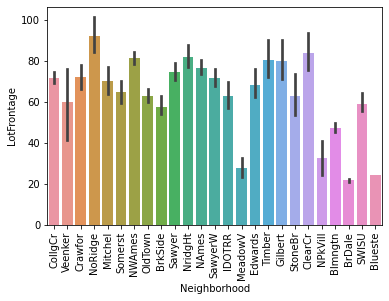

In [28]:
sns.barplot(data=df,x="Neighborhood",y="LotFrontage")
plt.xticks(rotation=90);

In [29]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

In [30]:
df.isnull().sum().sum()

0

No more null values

In [31]:
with open('C:/Users/User/Desktop/data_description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [32]:
df["MSSubClass"].dtypes

dtype('int64')

Changing MSSubClass type to str

In [33]:
df["MSSubClass"] = df["MSSubClass"].apply(str)

Checking correlation between numerical values and SalePrice

### Checking patterns between X features and y label

In [34]:
df.corr()["SalePrice"].sort_values()

KitchenAbvGr    -0.135935
EnclosedPorch   -0.128627
OverallCond     -0.077924
YrSold          -0.028907
LowQualFinSF    -0.025620
MiscVal         -0.021200
BsmtHalfBath    -0.016873
BsmtFinSF2      -0.011412
3SsnPorch        0.044571
MoSold           0.046380
PoolArea         0.092397
ScreenPorch      0.111419
BedroomAbvGr     0.168235
BsmtUnfSF        0.214446
BsmtFullBath     0.227082
GarageYrBlt      0.261413
LotArea          0.263837
HalfBath         0.284400
OpenPorchSF      0.315831
2ndFlrSF         0.319464
WoodDeckSF       0.324422
LotFrontage      0.346995
BsmtFinSF1       0.386436
Fireplaces       0.466968
MasVnrArea       0.472606
YearRemodAdd     0.507430
YearBuilt        0.523273
TotRmsAbvGrd     0.533779
FullBath         0.560881
1stFlrSF         0.605968
TotalBsmtSF      0.613905
GarageArea       0.623423
GarageCars       0.640473
GrLivArea        0.708618
OverallQual      0.791069
SalePrice        1.000000
Name: SalePrice, dtype: float64

##### Drawing scatter plots between SalePrice and some features to check patterns and remove outliers

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

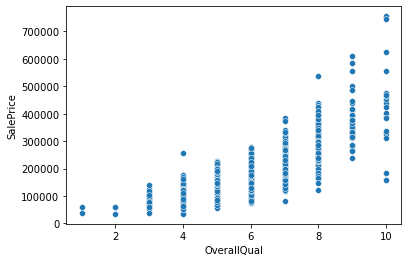

In [35]:
sns.scatterplot(data=df,x="OverallQual",y="SalePrice")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

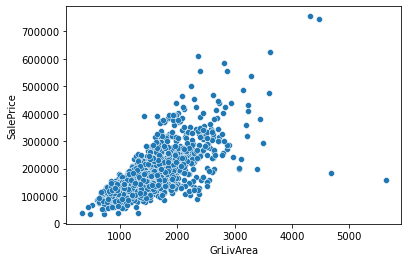

In [36]:
sns.scatterplot(data=df,x="GrLivArea",y="SalePrice")

In [37]:
df[(df['OverallQual']>8) & (df["SalePrice"]<200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [38]:
df[(df['GrLivArea']>4000) & (df["SalePrice"]<200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [39]:
df.drop(df[(df['GrLivArea']>4000) & (df["SalePrice"]<200000)].index,inplace=True)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

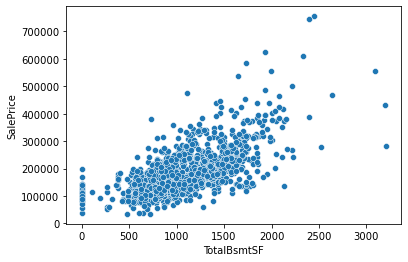

In [40]:
sns.scatterplot(data=df,x="TotalBsmtSF",y="SalePrice")

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

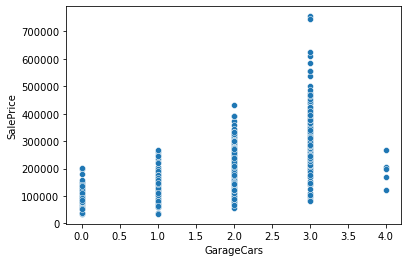

In [41]:
sns.scatterplot(data=df,x="GarageCars",y="SalePrice")

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

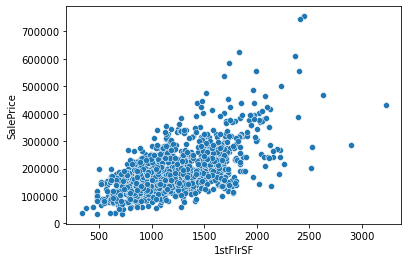

In [42]:
sns.scatterplot(data=df,x="1stFlrSF",y="SalePrice")

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

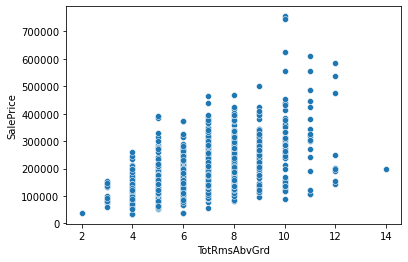

In [43]:
sns.scatterplot(data=df,x="TotRmsAbvGrd",y="SalePrice")

In [44]:
df=df[df["TotRmsAbvGrd"]<14]

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

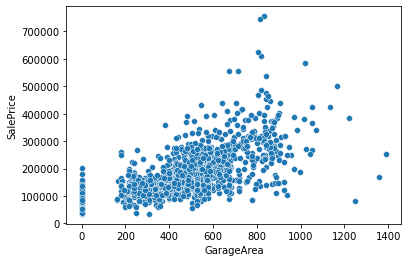

In [45]:
sns.scatterplot(data=df,x="GarageArea",y="SalePrice")

In [46]:
df[(df['GarageArea']>1200) & (df["SalePrice"]<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,20,RL,98.000000,12704,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2009,New,Partial,253293
1061,30,C (all),120.000000,18000,Grvl,Reg,Low,AllPub,Inside,Gtl,...,0,0,0,0,560,8,2008,ConLD,Normal,81000
1190,190,RL,70.083333,32463,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,0,0,3,2007,WD,Normal,168000


In [47]:
df.drop(df[(df['GarageArea']>1200) & (df["SalePrice"]<300000)].index,inplace=True)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

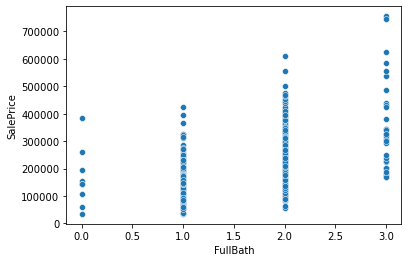

In [48]:
sns.scatterplot(data=df,x="FullBath",y="SalePrice")

#### Creating variables for  object and numeric columns

In [52]:
object_column = df.select_dtypes(include=["object"])
num_column = df.select_dtypes(exclude=["object"])

Get dummies on object columns

In [50]:
df_dummies = pd.get_dummies(object_column,drop_first=True)

In [51]:
final_df = pd.concat([num_column,df_dummies],axis=1)

#### Checking for most correlated features

In [52]:
abs(final_df.corr()["SalePrice"]).sort_values()[-15:]

MasVnrArea          0.477460
Foundation_PConc    0.498318
YearRemodAdd        0.506975
KitchenQual_TA      0.519520
YearBuilt           0.524105
TotRmsAbvGrd        0.540910
FullBath            0.561887
ExterQual_TA        0.591585
1stFlrSF            0.631920
GarageArea          0.643163
GarageCars          0.647236
TotalBsmtSF         0.651742
GrLivArea           0.737464
OverallQual         0.796122
SalePrice           1.000000
Name: SalePrice, dtype: float64

In [53]:
x=abs(final_df.corr()["SalePrice"]).sort_values()[-15:]
x

MasVnrArea          0.477460
Foundation_PConc    0.498318
YearRemodAdd        0.506975
KitchenQual_TA      0.519520
YearBuilt           0.524105
TotRmsAbvGrd        0.540910
FullBath            0.561887
ExterQual_TA        0.591585
1stFlrSF            0.631920
GarageArea          0.643163
GarageCars          0.647236
TotalBsmtSF         0.651742
GrLivArea           0.737464
OverallQual         0.796122
SalePrice           1.000000
Name: SalePrice, dtype: float64

Selecting feature with correlation higher than 0.6 with SalePrice

In [54]:
features = []
for key, value in x.items():
    if value>0.6 and value<1:   #taking values greater than 0.5 
        features.append(key)

In [55]:
features

['1stFlrSF',
 'GarageArea',
 'GarageCars',
 'TotalBsmtSF',
 'GrLivArea',
 'OverallQual']

In [56]:
X = final_df[features]
Y=final_df["SalePrice"]

##### Dealing with multicollinearity

In [57]:
def correlation(df,threshold):
    correlated_cols = []
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = [corr_matrix.columns[i],corr_matrix.columns[j]]
                correlated_cols.append(colname)
    return correlated_cols           

Adding highly correlated features(above 0.6) to a list

In [58]:
mat= correlation(X,0.6)  #for example GarageCars has a correlation greater than 0.6 with GarageArea
mat

[['GarageCars', 'GarageArea'],
 ['TotalBsmtSF', '1stFlrSF'],
 ['OverallQual', 'GarageCars']]

In [59]:
from collections import Counter
res = dict(sum(map(Counter, mat), Counter()))
str(res)
#counting how many times a feature is repeated in the above list for example GarageCars is correlated with 2 other features so 
#we decided to remove it

"{'GarageCars': 2, 'GarageArea': 1, 'TotalBsmtSF': 1, '1stFlrSF': 1, 'OverallQual': 1}"

In [ ]:
#Garagecars is correlated with 2 features.We can drop it 

In [60]:
X.drop(["GarageCars"],axis=1,inplace=True)

Again using the same function as above

In [61]:
def correlation(df,threshold):
    correlated_cols = []
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = [corr_matrix.columns[i],corr_matrix.columns[j]]
                correlated_cols.append(colname)
    return correlated_cols   
mat= correlation(X,0.6)
mat

[['TotalBsmtSF', '1stFlrSF']]

We can drop either of these 2 columns

In [62]:
X.drop(["1stFlrSF"],axis=1,inplace=True)

In [63]:
X.columns

Index(['GarageArea', 'TotalBsmtSF', 'GrLivArea', 'OverallQual'], dtype='object')

In [64]:
final_df=final_df[["GarageArea","TotalBsmtSF","GrLivArea","OverallQual","SalePrice"]]

## Multilinear Regression


#### 1st assumption : checking normality Y.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

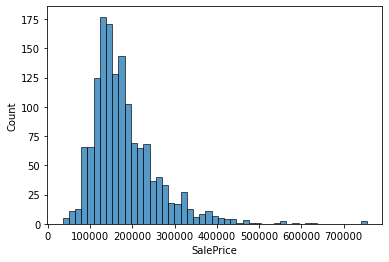

In [65]:
sns.histplot(final_df["SalePrice"])

In [66]:
#Applying log transformation on our SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

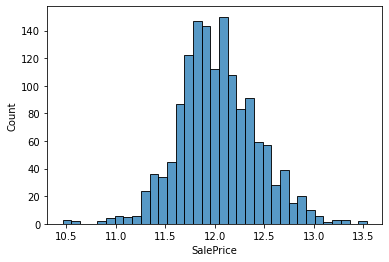

In [67]:
sns.histplot(np.log(final_df["SalePrice"]))

#### 2nd assumption : Checking for linearity between X features and Y.

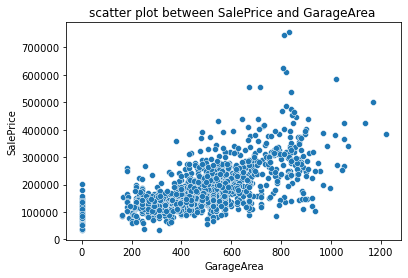

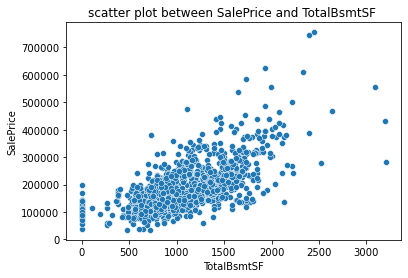

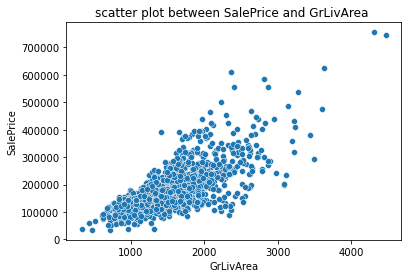

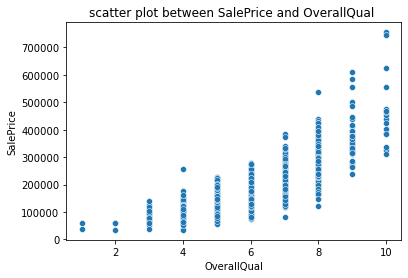

In [68]:
for i in X:
    sns.scatterplot(final_df[i],final_df["SalePrice"])
    plt.title("scatter plot between SalePrice and {} ".format(i))
    plt.show()


In [69]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [70]:
Y = np.log(final_df["SalePrice"])

#### 3rd assumption : Checking for homoscedasticity

Breusch-Pagan test p-value:  3.8324023948773413e-08


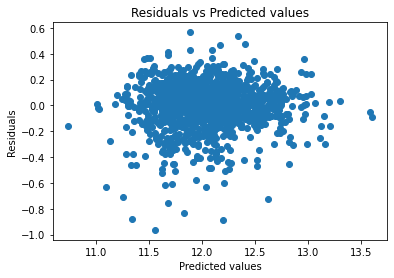

In [71]:
model = sm.OLS(Y, sm.add_constant(X)).fit()

# get the predicted values and residuals
y_pred = model.predict()
residuals = model.resid

# plot residuals against predicted values
fig, ax = plt.subplots()
ax.scatter(y_pred, residuals)
ax.set_xlabel("Predicted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Predicted values")

# perform Breusch-Pagan test for homoscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, sm.add_constant(X))
print("Breusch-Pagan test p-value: ", bp_test[1])

p-value is less than 0.05 and our resulting plot have no discernible pattern.

#### 4th assumption : Residuals should have 0 mean

In [72]:
residuals = model.resid
#print(residuals)
print("Mean of the residuals is: ",np.mean(residuals))

Mean of the residuals is:  -7.519869868651714e-15


#### 5th assumption: residuals should be normally distributed

<AxesSubplot:ylabel='Density'>

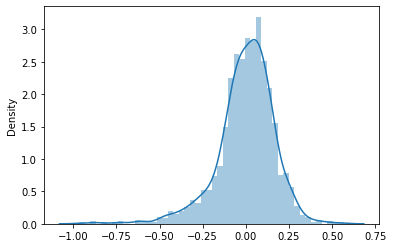

In [73]:
sns.distplot(residuals)

##### Splitting our data

In [74]:
X=final_df.drop("SalePrice",axis=1)
Y = np.log(final_df["SalePrice"])

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linear_model = make_pipeline(StandardScaler(), LinearRegression()).fit(x_train, y_train)

In [77]:
print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

Training score:  0.8248962955589446
Testing score:  0.8379956883425704


Training score qnd test score are very close --->no overfitting

In [78]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.027641884798690872

mean squarred error is very low

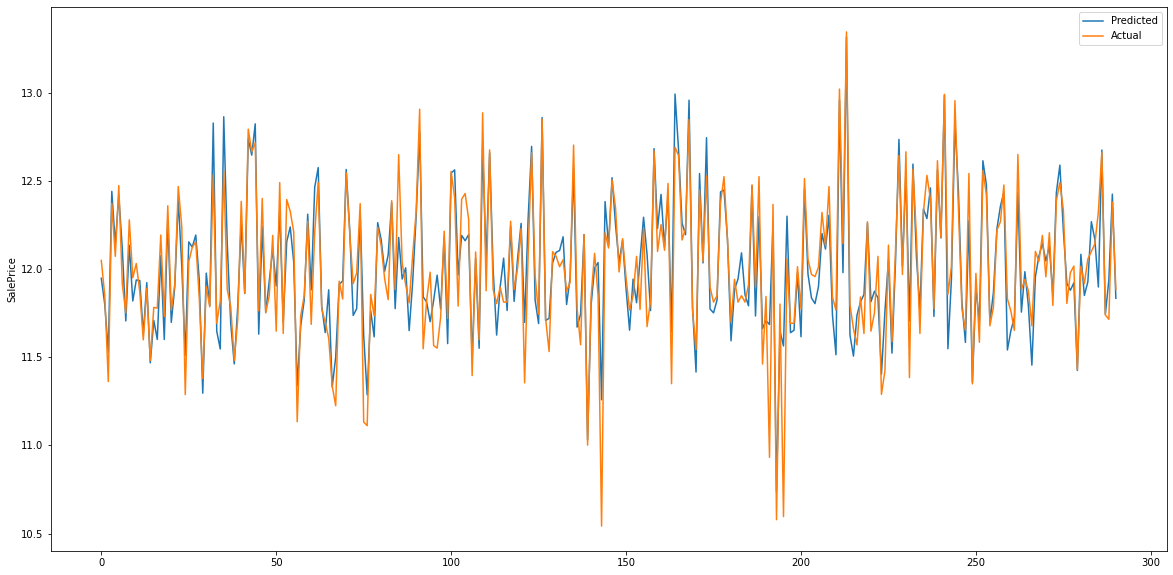

In [79]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('SalePrice')

plt.legend()
plt.show()

# Other MODELS

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [83]:
classifiers = { 
    'K-Nearest Neighbors' : KNeighborsRegressor(), 
    'Decision Tree' : DecisionTreeRegressor(), 
    'Random Forest' : RandomForestRegressor(),
    'support vector regressor':SVR(kernel='rbf'),
    'Lars':Lars(),
    'Ridge':Ridge()  
}

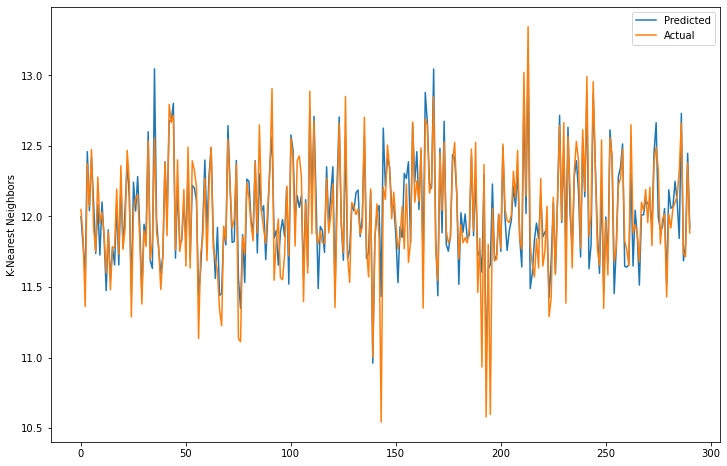

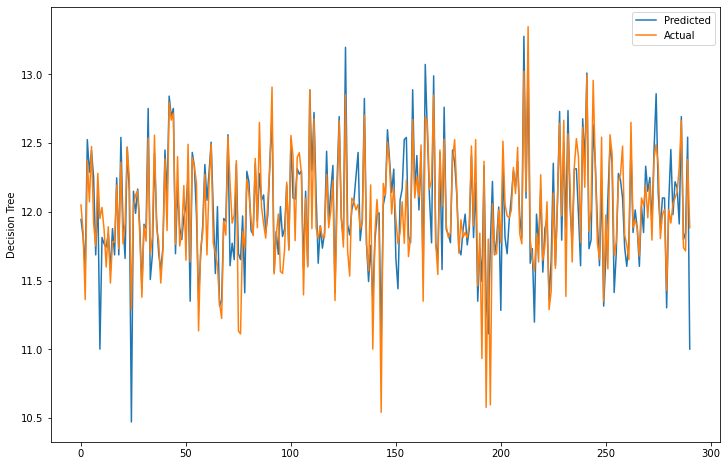

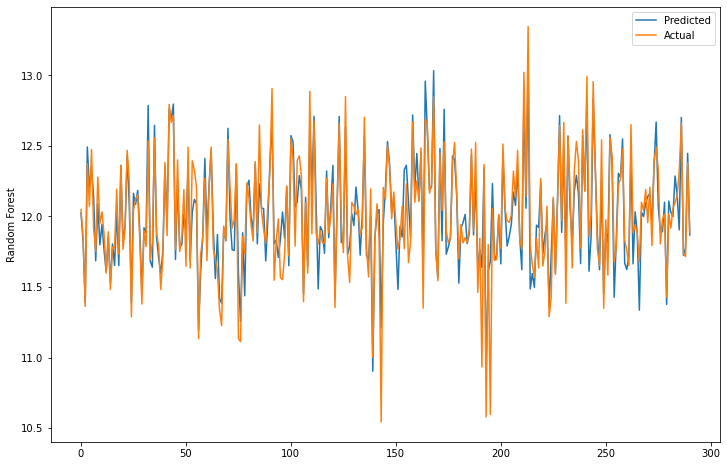

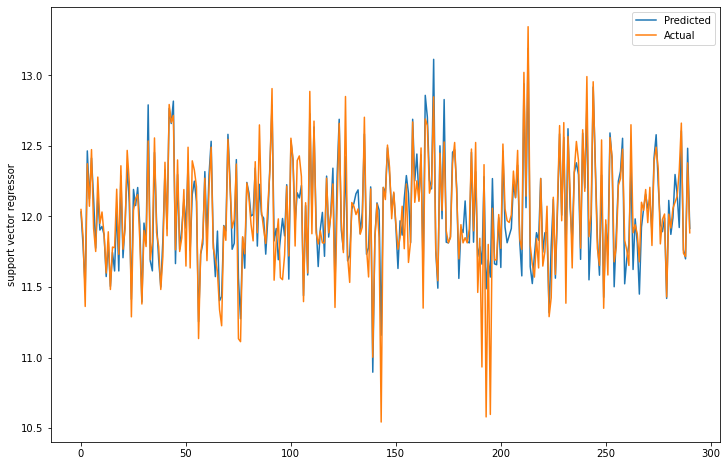

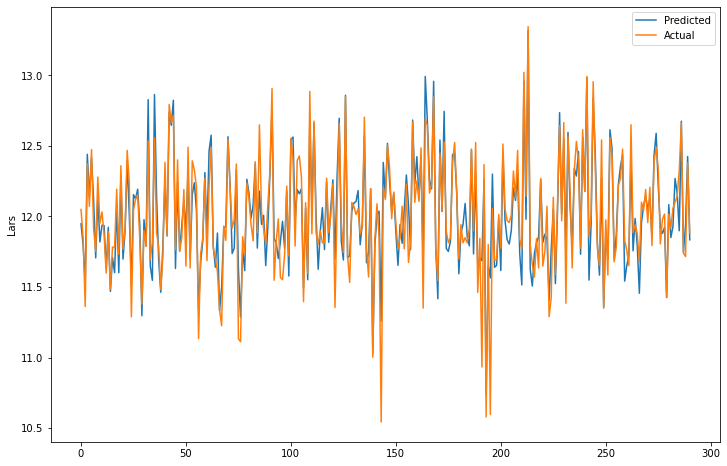

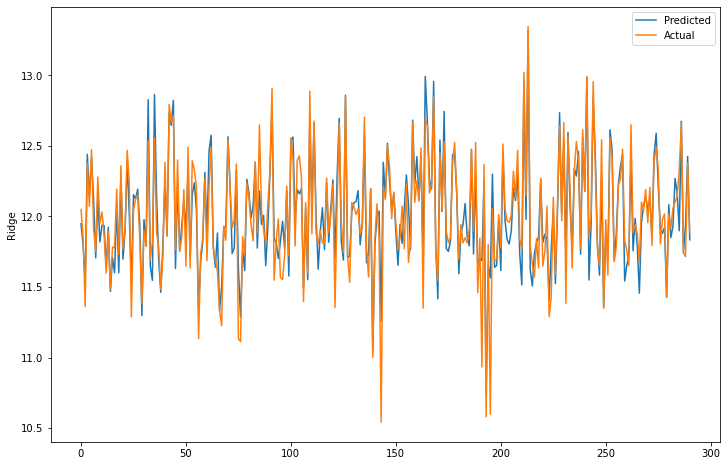

In [84]:
#2 mins to run
results = pd.DataFrame(columns= ['Train_score', 'Test_score','train_mse','test_mse'])

for key, value in classifiers.items():
    #fit models
    value.fit(X_train_scaled, y_train)
    
    # Evaluate the model on the training set
    y_train_pred = value.predict(X_train_scaled)
    train_score = r2_score(y_train, y_train_pred)*100
    train_mse = mean_squared_error(y_train, y_train_pred)
    
    # Evaluate the model on the test set
    y_test_pred = value.predict(X_test_scaled)
    test_score = r2_score(y_test, y_test_pred)*100
    test_mse = mean_squared_error(y_test, y_test_pred)
      
    fig, ax = plt.subplots(figsize=(12, 8))     
    plt.plot(y_test_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')     
    plt.ylabel(key)
    plt.legend()
    plt.show() 

    results.loc[key] = [round(train_score, 2), round(test_score, 2), 
                        round(train_mse, 2), round(test_mse, 2)]

In [85]:
results.sort_values(by= ['Test_score', 'Train_score'], ascending= False)


,Train_score,Test_score,train_mse,test_mse
Lars,82.49,83.80,0.03,0.03
Ridge,82.49,83.80,0.03,0.03
support vector regressor,85.43,83.70,0.02,0.03
Random Forest,97.23,82.51,0.00,0.03
K-Nearest Neighbors,87.35,80.50,0.02,0.03
Decision Tree,99.93,67.75,0.00,0.06


## Hyper Parameter tuning

In [86]:
def get_results(model, model_name):
    # Evaluate the model on the training set
    y_train_pred = model.predict(X_train_scaled)
    train_score = r2_score(y_train, y_train_pred)*100
    train_mse = mean_squared_error(y_train, y_train_pred)
    print("training score is : ",train_score)

    # Evaluate the model on the test set
    y_test_pred = model.predict(X_test_scaled)
    test_score = r2_score(y_test, y_test_pred)*100
    test_mse = mean_squared_error(y_test, y_test_pred)
    print("test score is :",test_score)
    
    # save measurements into results df
    results.loc[model_name] = [round(train_score, 2), round(test_score, 2), 
                        round(train_mse, 2), round(test_mse, 2)]

In [87]:
RF = RandomForestRegressor()
param_grid_RF = {
    'n_estimators' : [15,20,25],
    'max_depth' : [5,7,10], 
    'min_samples_split' : [2,1,3,4], 
    'min_samples_leaf' : [5,7,9],
    'random_state' : [42]
}

# Instantiate Randomized Search
GS_RF = GridSearchCV(RF, param_grid_RF,cv=5,scoring= 'r2')
GS_RF.fit(X_train_scaled, y_train)
GS_RF.best_params_

{'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 20,
 'random_state': 42}

In [88]:
get_results(GS_RF,'GS random forest')

training score is :  87.19356873931248
test score is : 82.44849239408603


In [89]:
KNN = KNeighborsRegressor()

param_grid_KNN = {
    'n_neighbors' : [3,5,10,12,18,15,20], 
    'weights' : ['uniform', 'distance']
}

# Instantiate Grid Search
GS_KNN = GridSearchCV(KNN, param_grid_KNN,cv=5,scoring= 'r2')
# fit model
GS_KNN.fit(X_train_scaled, y_train)
GS_KNN.best_params_


{'n_neighbors': 15, 'weights': 'distance'}

In [90]:
get_results(GS_KNN, 'GS KNN')

training score is :  99.93187737715394
test score is : 82.43563603144584


In [91]:
SVR = SVR()
param_grid_SVR = {
    'kernel' : ['linear','rbf'],
    'C':[2,5,10,20],
    'epsilon':[0.05, 0.1, 0.2]
}

# Instantiate Grid Search
GS_SVR = GridSearchCV(SVR, param_grid_SVR,cv=5,scoring= 'r2')
# fit model
GS_SVR.fit(X_train_scaled, y_train)
GS_SVR.best_params_

{'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}

In [92]:
get_results(GS_SVR, 'GS SVR')

training score is :  82.37364916792907
test score is : 83.56120802671427


In [93]:
DT = DecisionTreeRegressor()
param_grid_DT = {
    'max_depth' : [3, 4, 5,6], 
    'min_samples_split' : [0.01,0.02,0.03], 
    'min_samples_leaf' : [8,9,10,11,14,18] 
}

# Instantiate Grid Search
GS_DT = GridSearchCV(DT, param_grid_DT,cv=5,scoring= 'r2')
# fit model
GS_DT.fit(X_train_scaled, y_train)
GS_DT.best_params_

{'max_depth': 6, 'min_samples_leaf': 11, 'min_samples_split': 0.01}

In [94]:
get_results(GS_DT, 'GS DT')

training score is :  84.27503382979363
test score is : 80.33507575591032


In [95]:
Lasso= Lasso()
param_grid_Lasso = {
    'alpha':[0.1,0.2,0.3,0.5]
}

# Instantiate Grid Search
GS_Lasso = GridSearchCV(Lasso, param_grid_Lasso,cv=5,scoring= 'r2')
# fit model
GS_Lasso.fit(X_train_scaled, y_train)
GS_Lasso.best_params_

{'alpha': 0.1}

In [96]:
get_results(GS_Lasso, 'GS LAsso')

training score is :  72.3141263588371
test score is : 74.07919698489427


In [97]:
Ridge= Ridge()
param_grid_Ridge = {
    'alpha':[0.5,0.7,0.8,0.9,1,10,20,30]
}

# Instantiate Grid Search
GS_Ridge = GridSearchCV(Ridge, param_grid_Ridge,cv=5,scoring= 'r2')
# fit model
GS_Ridge.fit(X_train_scaled, y_train)
GS_Ridge.best_params_

{'alpha': 10}

In [98]:
get_results(GS_Ridge, 'GS Ridge')

training score is :  82.48826813327925
test score is : 83.79880772206143


In [99]:
elastic= ElasticNet()
param_grid_elastic = {
    'alpha':[0.01,0.05,0.1,0.2,0.8,0.9,1],
    'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6],
    'normalize':[True,False],
    'max_iter':[100,300,500,1000,5000,10000]
}

# Instantiate Grid Search
GS_elastic = GridSearchCV(elastic, param_grid_elastic,cv=5,scoring= 'r2')
# fit model
GS_elastic.fit(X_train_scaled, y_train)
GS_elastic.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100, 'normalize': False}

In [100]:
get_results(GS_elastic, 'GS elastic')

training score is :  82.48524542532132
test score is : 83.7996576171545


In [101]:
LARS = Lars()
param_grid_LARS = {
    'n_nonzero_coefs':[2,3,4,5,6],
}

# Instantiate Grid Search
GS_LARS = GridSearchCV(LARS, param_grid_LARS,cv=5,scoring= 'r2')
# fit model
GS_LARS.fit(X_train_scaled, y_train)
GS_LARS.best_params_

{'n_nonzero_coefs': 4}

In [102]:
get_results(GS_LARS, 'GS LARS')

training score is :  82.48962955589447
test score is : 83.79956883425704


In [103]:
results.sort_values(by= ['Test_score', 'Train_score'], ascending= False)
#Sorting our dataframe descendingly by test_score

,Train_score,Test_score,train_mse,test_mse
Lars,82.49,83.80,0.03,0.03
Ridge,82.49,83.80,0.03,0.03
GS Ridge,82.49,83.80,0.03,0.03
GS elastic,82.49,83.80,0.03,0.03
GS LARS,82.49,83.80,0.03,0.03
support vector regressor,85.43,83.70,0.02,0.03
GS SVR,82.37,83.56,0.03,0.03
Random Forest,97.23,82.51,0.00,0.03
GS random forest,87.19,82.45,0.02,0.03
GS KNN,99.93,82.44,0.00,0.03
